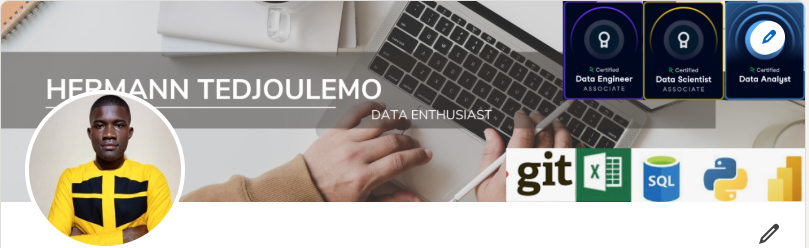

## PROJET 4 : ANALYSE DU MARCHE

### OBJECTIF : Analyser chaque pays pour resortir des groupes de pays ayant des similitudes et Choisir le meilleur pays pour activitée

## SOMMAIRE
#### <a href="#resume"> 1-RESUME </a>
#### <a href="#forme"> 2-ANALYSE DE LA FORME</a>
#### <a href="#fond"> 3-ANALYSE DU FOND </a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, dendrogram
from warnings import filterwarnings
filterwarnings('ignore')

C:\Users\HERMANN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_columns',None)

In [3]:
sns.set(style='white', context='notebook', # Styles de Seaborn
        palette=['#ff5252', '#1de9b6'])
#mpl.rcParams["figure.figsize"] = (9,6)

### <a id="resume"> 1-RESUME </a>

### A- Analyse de la forme

#### -Le dataframe de la population :
- Le dataframe de la population donne les informations sur la population de chaque pays de 2000 à 2018 . Elle contient 4411 lignes et 15 colonnes. 14 colonnes ne contiennent pas de valeur 'NAN' ni de valeurs dupliquées.Mais la colonnes 'Note' contient que des valeurs 'NAN', j'ai  supprimé cette colonne qui s'avère inutile ainsi que d'autre colonnes pour ne laisser que quatre colonnes : Code zone, Zone, Année, Valeur  
#### -Le dataframe du PIB :
- Le dataframe du PIB contient 8008 lignes et 15 colonnes. 14 colonnes ne contiennent pas de valeur 'NAN' ni de valeurs dupliquées.Mais la colonnes 'Note' contient que des valeurs 'NAN', j'ai  supprimé cette colonne qui s'avère inutile ainsi que d'autre colonnes pour ne laisser que quatre colonnes : Zone, Element, Année, Valeur 
#### - Le dataframe des transactions de la disponibilité alimentaire  2017 :
- Le dataframe de la diposition alimentaire contient 176600 lignes et 14 colonnes. Elle ne contient  pas de valeur 'NAN' ni de valeurs dupliquées.j'ai supprimer les colonnes qui s'avère inutile  pour ne laisser que quatre colonnes : Zone, Élément, Produit, Année, Unité, Valeur
#### Analyse du dataframe des protein 
- Le dataframe de la diposition proteique contient 720 lignes et 14 colonnes. Elle ne contient  pas de valeur 'NAN' ni de valeurs dupliquées.j'ai supprimer les colonnes qui s'avère inutile  pour ne laisser que quatre colonnes : Zone, Élément, Produit, Année, Valeur

### B- Analyse du fond  

#### i-Calcul des informations neccessaires :
- Comme données, nous avons pris ou calculés les informations suivantes : La population, Le taux de variation de la population, Le PIB, Le taux de variation du PIB par habitant, Le PIB par habitant, La disponibilité proteique, disponibilité calorifique, le ratio de la disponibilité protieque d'origine animale, le ratio de la disponibilité calorifique d'origine animale et la différence des importation et les exportation de la volaille.  
#### ii-ACP
- Variance conservée par chaque plan [0.46511791, 0.19312702, 0.13240719, 0.07055208] donc le premier plan factoril contient 46,51% des informtions, le second 19,31% , le troisièmes 13,24% et le quatrième 7%.  
- J'ai réalisé une ACP à quatre composantes : les quatres plans factorielles contiennent au total 86,12% des informations contenu dans les données initiales.  
#### iii-Cercle des corrélations
- R1: Les variables PIB, Population  sont très bien representée.      
- R2:Les variables population et PIB sont très correlés et influencent plus dans la construiction du deuxième plan factoriel.      
- R3: Les variables dispo_cal, dispo_proteique, ratio_dispocal_ani, ratio_dispo_prot_ani influence plus dans la constructon du premier plan factoriel et la qualité de la représentation est moyenne.      
- R4:La variable taux_var_popu et taux_var_pib sont mal représentées. 
#### iv-Projection des individus sur le plan factoriel
- D'entré de jeu on remarque la formation de 4 groupes bien séparés.    
#### v- Classification hierarchique:
- Le dendrogramme nous montre qu'on peut choisir 4 clusters
#### vi- Classification avec Kmeans:
- La méthode des coudes et le coefficient de silhouette nous donne le nombre de clusters optimal : 3 clusters Mais par la suite je vais classer en 4 clusters   
- Avec la methode Elbow on voit que le nombre optimal de clusters est 4 clusters.  
- la méthode de Kmean nous resort un nombre de clusters égal à 4 de meme que le dendrogramme de la classification hiérarchique nous laisse croire qu'on peut choisir 4 clusters.    
- Les centroides  sont très éloignés entre eux donc la distance inter-clusters est importante donc nos clusters sont homogènes et ont également une bonne forme (Distance intra-clusters est faible).    
- Les variables PIB, Population et taux_var_pib sont très bien representée alors que les autres la qualité de la repésentation est très faible.    
- La variable Population influencent plus dans la construiction du deuxième plan factoriel ainsi que la variable PIB mais la variable taux_var_pib influence n"gativement la construction du deuxème plan factoriel.    
- dispo_proteique, ratio_dispocal_ani,pib_par_hab, ratio_dispo_prot_ani influence plus dans la constructon du premier plan factoriel.    
- La variable taux_var_popu est mal représenté et est corrélé négativement avec les deux premier plan factoriel.   
#### vii- Analyse de chaque cluster :
-  Le cluster_outliers contient trois pays. Donc ce cluster n'est pas pertinent.  
- Le cluster 2 est constitué des pays africains et des petits pays d'asie, il est le cluster avec le taux de variation de la population le plus élevé et avec le PIB par habitant le plus faible. C'est le cluter qui contient la mediane de la disponibilité  calorifique, la disponibilité  proteique, le ratio disponibilité proteique d'origine animale, le ratio disponibilité calorifique les plus faibles. La mediane de son taux de variation du PIB et d'autres données sont presque égales à aux données du cluster 0. Donc il faut étudier les clusters 1 et 3 pour faire notre choix du meilleur cluster. 
- Dans le cluster 1 le PIB par habitant est élevé et ces pays consomment plus la viande que dans le clusters 3 et importent plus qu'ils exportent.
-  Dans le cluster 3 le PIB par habitant est inférieur à celle du cluster1 et il es est de meme avec  la disponibilité proteique d'origine animale donc ces pays consomment  moin de viande que ceux du cluster 1.  
- Donc nous allons choisir les pays du cluster 1 donc la différence des importation et des exportations est positive.car ils consomment beaucoup de vaiande importent plus, ont un pib élevé et une population élevé (La demande sera importante) alors nos articles peuvent etre vendu a de meilleur prix. 
#### viii- Quelques proposition :
- <b> Meilleurs pays : </b> La chine de Hong-kong est l'un des plus gros consommateur de la volaille, l'un des plus gros importateur de la volaille avec un PIB élevé et une forte population donc elle est le premier pays à cibler. Dans la meme logique nous pouvons choisir : Suède, Suisse, La Roumanie, l'Autriche et la grèce.

### <a id="forme">  2-ANALYSE DE LA FORME </a>

#### a-Analyse du dataframe de la population 2000 et 2018

In [289]:
data_popu=pd.read_csv('Population_2000_2018.csv')
data_popu.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [290]:
data_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [291]:
data_popu.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

In [292]:
data_popu.duplicated().value_counts()

False    4411
dtype: int64

In [293]:
data_popu=data_popu.drop(['Note','Symbole','Description du Symbole','Code Domaine','Domaine','Code Élément','Produit','Code année','Code Produit','Unité','Élément'],axis=1)
data_popu['Valeur']=data_popu['Valeur']*1000
data_popu.head()

,Code zone,Zone,Année,Valeur
0,2,Afghanistan,2000,20779953.0
1,2,Afghanistan,2001,21606988.0
2,2,Afghanistan,2002,22600770.0
3,2,Afghanistan,2003,23680871.0
4,2,Afghanistan,2004,24726684.0


<b>Conclusion : </b> Le dataframe de la population donne les informations sur la population de chaque pays de 2000 à 2018 . Elle contient 4411 lignes et 15 colonnes. 14 colonnes ne contiennent pas de valeur 'NAN' ni de valeurs dupliquées.Mais la colonnes 'Note' contient que des valeurs 'NAN', j'ai  supprimé cette colonne qui s'avère inutile ainsi que d'autre colonnes pour ne laisser que quatre colonnes : Code zone, Zone, Année, Valeur

#### b-Analyse du dataframe du PIB  

In [294]:
data_pib=pd.read_csv('PIB par habitant.csv')
data_pib.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2000,2000,millions,3342.034168,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2000,2000,US$,160.829727,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2001,2001,millions,3598.470576,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,4,Afghanistan,6119,Valeur US $ par habitant,22008,Produit Intérieur Brut,2001,2001,US$,166.541981,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,4,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2002,2002,millions,4141.523943,X,Ciffre de sources internationales,NaN


In [295]:
data_pib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8008 entries, 0 to 8007
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            8008 non-null   object 
 1   Domaine                 8008 non-null   object 
 2   Code zone (M49)         8008 non-null   int64  
 3   Zone                    8008 non-null   object 
 4   Code Élément            8008 non-null   int64  
 5   Élément                 8008 non-null   object 
 6   Code Produit            8008 non-null   int64  
 7   Produit                 8008 non-null   object 
 8   Code année              8008 non-null   int64  
 9   Année                   8008 non-null   int64  
 10  Unité                   8008 non-null   object 
 11  Valeur                  8008 non-null   float64
 12  Symbole                 8008 non-null   object 
 13  Description du Symbole  8008 non-null   object 
 14  Note                    0 non-null      

In [296]:
data_pib.isna().sum()

Code Domaine                 0
Domaine                      0
Code zone (M49)              0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      8008
dtype: int64

In [297]:
data_pib.duplicated().any()

False

In [298]:
data_pib=data_pib.drop(['Code zone (M49)','Domaine','Code Domaine','Note','Symbole','Description du Symbole','Code année','Code Produit','Code Élément','Produit','Unité'],axis=1)
data_pib.head()

,Zone,Élément,Année,Valeur
0,Afghanistan,Valeur US $,2000,3342.034168
1,Afghanistan,Valeur US $ par habitant,2000,160.829727
2,Afghanistan,Valeur US $,2001,3598.470576
3,Afghanistan,Valeur US $ par habitant,2001,166.541981
4,Afghanistan,Valeur US $,2002,4141.523943


<b>Conclusion : </b> Le dataframe du PIB contient 8008 lignes et 15 colonnes. 14 colonnes ne contiennent pas de valeur 'NAN' ni de valeurs dupliquées.Mais la colonnes 'Note' contient que des valeurs 'NAN', j'ai  supprimé cette colonne qui s'avère inutile ainsi que d'autre colonnes pour ne laisser que quatre colonnes : Zone, Element, Année, Valeur

#### c-Analyse du dataframe de la disponibilité alimentaire  2017

In [299]:
data_dispo_2017=pd.read_csv('DisponibiliteAlimentaire_2017.csv')
data_dispo_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [300]:
data_dispo_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [301]:
data_dispo_2017.isna().sum().any()

False

In [302]:
data_dispo_2017.duplicated().sum()

0

In [303]:
data_dispo_2017=data_dispo_2017.drop(['Symbole','Description du Symbole','Code année','Code Produit','Code Élément','Code zone','Domaine','Code Domaine'],axis=1)
data_dispo_2017.head()

,Zone,Élément,Produit,Année,Unité,Valeur
0,Afghanistan,Production,Blé et produits,2017,Milliers de tonnes,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2017,Milliers de tonnes,2302.0
2,Afghanistan,Variation de stock,Blé et produits,2017,Milliers de tonnes,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,2017,Milliers de tonnes,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,2017,Milliers de tonnes,6701.0


<b>Conclusion : </b> Le dataframe de la diposition alimentaire contient 176600 lignes et 14 colonnes. Elle ne contient  pas de valeur 'NAN' ni de valeurs dupliquées.j'ai supprimer les colonnes qui s'avère inutile  pour ne laisser que quatre colonnes : Zone, Élément, Produit, Année, Unité, Valeur

#### d-Analyse du dataframe des protein 

In [304]:
data_protein=pd.read_csv('Protein_df.csv')
data_protein.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2901,Total General,2017,2017,Kcal/personne/jour,2303.00,E,Valeur estimée
1,FBS,Bilans Alimentaires (2010-),4,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,S2901,Total General,2017,2017,g/personne/jour,59.50,E,Valeur estimée
2,FBS,Bilans Alimentaires (2010-),4,Afghanistan,664,Disponibilité alimentaire (Kcal/personne/jour),S2941,Produits Animaux,2017,2017,Kcal/personne/jour,195.00,E,Valeur estimée
3,FBS,Bilans Alimentaires (2010-),4,Afghanistan,674,Disponibilité de protéines en quantité (g/pers...,S2941,Produits Animaux,2017,2017,g/personne/jour,11.16,E,Valeur estimée
4,FBS,Bilans Alimentaires (2010-),710,Afrique du Sud,664,Disponibilité alimentaire (Kcal/personne/jour),S2901,Total General,2017,2017,Kcal/personne/jour,2902.00,E,Valeur estimée


In [305]:
data_protein.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            720 non-null    object 
 1   Domaine                 720 non-null    object 
 2   Code zone (M49)         720 non-null    int64  
 3   Zone                    720 non-null    object 
 4   Code Élément            720 non-null    int64  
 5   Élément                 720 non-null    object 
 6   Code Produit (CPC)      720 non-null    object 
 7   Produit                 720 non-null    object 
 8   Code année              720 non-null    int64  
 9   Année                   720 non-null    int64  
 10  Unité                   720 non-null    object 
 11  Valeur                  720 non-null    float64
 12  Symbole                 720 non-null    object 
 13  Description du Symbole  720 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory 

In [306]:
data_protein.isna().sum().any()

False

In [307]:
data_protein.duplicated().sum()

0

In [308]:
data_protein=data_protein.drop(['Unité','Code zone (M49)','Symbole','Code Domaine','Description du Symbole','Code année','Code Produit (CPC)','Code Élément','Code Produit (CPC)','Domaine','Code Domaine'],axis=1)

In [309]:
data_protein.head()

,Zone,Élément,Produit,Année,Valeur
0,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Total General,2017,2303.00
1,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Total General,2017,59.50
2,Afghanistan,Disponibilité alimentaire (Kcal/personne/jour),Produits Animaux,2017,195.00
3,Afghanistan,Disponibilité de protéines en quantité (g/pers...,Produits Animaux,2017,11.16
4,Afrique du Sud,Disponibilité alimentaire (Kcal/personne/jour),Total General,2017,2902.00


<b>Conclusion : </b> Le dataframe de la diposition proteique contient 720 lignes et 14 colonnes. Elle ne contient  pas de valeur 'NAN' ni de valeurs dupliquées.j'ai supprimer les colonnes qui s'avère inutile  pour ne laisser que quatre colonnes : Zone, Élément, Produit, Année, Valeur

### <a id="fond">  2-ANALYSE DE LA FOND </a>

### 1-Calculons les informations necessaire a la segmentation des pays

extraction des données de la population a l'aide de la fonction pivot_table de pandas

In [310]:
popu=pd.pivot_table(data_popu,index='Zone',values='Valeur',columns='Année')
popu.head()

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0


Créons un dataframe qui ne contient que les populations des années 2000 et 2018

In [311]:
popu_df=pd.DataFrame()
popu_df['Population 2000']=popu[2000]
popu_df['Population 2018']=popu[2018]
popu_df.head()

,Population 2000,Population 2018
Zone,,
Afghanistan,20779953.0,37171921.0
Afrique du Sud,44967708.0,57792518.0
Albanie,3129243.0,2882740.0
Algérie,31042235.0,42228408.0
Allemagne,81400882.0,83124418.0


Extraction des données du PIB

In [312]:
PIB=pd.pivot(data_pib,index='Zone',values='Valeur',columns=['Élément','Année'])
PIB.head()

Élément,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant,Valeur US $,Valeur US $ par habitant
Année,2000,2000,2001,2001,2002,2002,2003,2003,2004,2004,2005,2005,2006,2006,2007,2007,2008,2008,2009,2009,2010,2010,2011,2011,2012,2012,2013,2013,2014,2014,2015,2015,2016,2016,2017,2017,2018,2018
Zone,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.342034e+03,160.829727,3.598471e+03,166.541981,4.141524e+03,183.247028,4.729042e+03,199.698828,5.388482e+03,217.921744,6.220574e+03,242.477079,7.104711e+03,268.781382,9.412162e+03,347.305373,1.023690e+04,369.266275,1.159513e+04,408.353930,1.469889e+04,503.636606,1.735069e+04,576.101770,1.913650e+04,614.109574,1.962180e+04,608.058642,1.955070e+04,585.862673,1.871305e+04,543.768940,1.801956e+04,509.271172,1.889635e+04,520.616409,1.841885e+04,495.504343
Afrique du Sud,1.384357e+05,3078.559000,1.234348e+05,2708.610043,1.157481e+05,2508.034167,1.752557e+05,3751.257342,2.285904e+05,4833.636043,2.577716e+05,5383.633716,2.716367e+05,5601.973365,2.994168e+05,6095.649756,2.867690e+05,5760.789227,2.959374e+05,5862.814931,3.753483e+05,7328.593646,4.164170e+05,8007.441620,3.963294e+05,7501.598532,3.666449e+05,6829.289494,3.506376e+05,6428.506306,3.174156e+05,5730.934452,2.963410e+05,5272.254217,3.490067e+05,6121.876572,3.680939e+05,6369.231608
Albanie,3.487586e+03,1114.514374,3.926888e+03,1254.715333,4.355866e+03,1393.347835,5.561459e+03,1783.649274,7.177030e+03,2311.523352,8.052079e+03,2608.543874,8.896076e+03,2904.347050,1.067732e+04,3519.225201,1.288135e+04,4289.954520,1.204421e+04,4051.132168,1.192695e+04,4045.744651,1.289087e+04,4401.730703,1.231978e+04,4227.650566,1.277628e+04,4399.863881,1.322824e+04,4567.281443,1.138692e+04,3939.413126,1.186136e+04,4109.340457,1.301973e+04,4514.204908,1.515644e+04,5257.650696
Algérie,5.466690e+04,1761.048998,5.505673e+04,1750.527274,5.681921e+04,1783.676549,6.786385e+04,2103.382141,8.533252e+04,2610.182686,1.031982e+05,3113.094277,1.170273e+05,3478.709639,1.349771e+05,3950.513625,1.710007e+05,4923.630825,1.372110e+05,3883.270236,1.612073e+05,4480.786823,2.000191e+05,5455.843408,2.090591e+05,5592.223152,2.097550e+05,5499.587619,2.138100e+05,5493.054962,1.659791e+05,4177.884976,1.600342e+05,3946.454210,1.700970e+05,4109.696001,1.754152e+05,4153.961485
Allemagne,1.943144e+06,23871.287934,1.944090e+06,23867.369687,2.068718e+06,25372.111751,2.496032e+06,30583.242979,2.809310e+06,34408.222753,2.845732e+06,34872.995017,2.992043e+06,36724.704669,3.421054e+06,42090.857150,3.730166e+06,46014.080083,3.397586e+06,41997.379789,3.396354e+06,42020.042704,3.744409e+06,46309.805638,3.527345e+06,43562.189239,3.732743e+06,45984.263064,3.883920e+06,47684.495157,3.356236e+06,41036.091778,3.467498e+06,42186.872393,3.690849e+06,44651.829102,3.977289e+06,47847.426197


In [313]:
pib_df=pd.DataFrame()
pib_df['pib_2018']=PIB.iloc[:,-2]
pib_df['pib_hab_2018']=PIB.iloc[:,-1]
pib_df['pib_hab_2000']=PIB.iloc[:,1]
pib_df.head()

,pib_2018,pib_hab_2018,pib_hab_2000
Zone,,,
Afghanistan,1.841885e+04,495.504343,160.829727
Afrique du Sud,3.680939e+05,6369.231608,3078.559000
Albanie,1.515644e+04,5257.650696,1114.514374
Algérie,1.754152e+05,4153.961485,1761.048998
Allemagne,3.977289e+06,47847.426197,23871.287934


Extraction des information sur la disposition alimentaire

In [314]:
partition=data_dispo_2017[((data_dispo_2017['Élément']=='Importations - Quantité')|(data_dispo_2017['Élément']=='Exportations - Quantité'))&(data_dispo_2017['Produit']=='Viande de Volailles')]
partition.head()

,Zone,Élément,Produit,Année,Unité,Valeur
652,Afghanistan,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,29.0
1705,Afrique du Sud,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,514.0
1707,Afrique du Sud,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,63.0
2714,Albanie,Importations - Quantité,Viande de Volailles,2017,Milliers de tonnes,38.0
2716,Albanie,Exportations - Quantité,Viande de Volailles,2017,Milliers de tonnes,0.0


In [315]:
dispo=pd.pivot_table(partition,index='Zone',values='Valeur',columns=['Élément','Produit'])
dispo.head()

Élément,Exportations - Quantité,Importations - Quantité
Produit,Viande de Volailles,Viande de Volailles
Zone,,
Afghanistan,NaN,29.0
Afrique du Sud,63.0,514.0
Albanie,0.0,38.0
Algérie,0.0,2.0
Allemagne,646.0,842.0


In [316]:
viande_volaille=pd.DataFrame()
viande_volaille['importation']=dispo.iloc[:,1]
viande_volaille['exportation']=dispo.iloc[:,0]
viande_volaille.head()

,importation,exportation
Zone,,
Afghanistan,29.0,NaN
Afrique du Sud,514.0,63.0
Albanie,38.0,0.0
Algérie,2.0,0.0
Allemagne,842.0,646.0


Extraction des information sur la proteine

In [317]:
proteine=pd.pivot_table(data_protein,index='Zone',values='Valeur',columns=['Élément','Produit'])
proteine.head()

Élément        Disponibilité alimentaire (Kcal/personne/jour)                \
Produit                                      Produits Animaux Total General   
Zone                                                                          
Afghanistan                                             195.0        2303.0   
Afrique du Sud                                          466.0        2902.0   
Albanie                                                1034.0        3326.0   
Algérie                                                 409.0        3383.0   
Allemagne                                              1070.0        3542.0   

Élément        Disponibilité de protéines en quantité (g/personne/jour)  \
Produit                                                Produits Animaux   
Zone                                                                      
Afghanistan                                                 11.16         
Afrique du Sud                                              35.44         
Albanie                                                     62.71         
Algérie                                                     25.92         
Allemagne                                                   62.77         

Élément                       
Produit        Total General  
Zone                          
Afghanistan            59.50  
Afrique du Sud         79.70  
Albanie               114.72  
Algérie                88.64  
Allemagne             104.05

In [318]:
proteine_df=pd.DataFrame()
proteine_df['dipo_proteine']=proteine.iloc[:,-1]
proteine_df['dipo_cal']=proteine.iloc[:,1]
proteine_df['dipo_proteine_ani']=proteine.iloc[:,2]
proteine_df['dipo_cal_ani']=proteine.iloc[:,0]
proteine_df.head()

,dipo_proteine,dipo_cal,dipo_proteine_ani,dipo_cal_ani
Zone,,,,
Afghanistan,59.50,2303.0,11.16,195.0
Afrique du Sud,79.70,2902.0,35.44,466.0
Albanie,114.72,3326.0,62.71,1034.0
Algérie,88.64,3383.0,25.92,409.0
Allemagne,104.05,3542.0,62.77,1070.0


Concatenation de toutes les informations utiles en un seul dataframe

In [319]:
#data=pd.concat([popu_df,pib_df,proteine_df,viande_volaille],ignore_index=True)
merge1=pd.merge(popu_df,pib_df,how='inner',on='Zone')
merge2=pd.merge(merge1,proteine_df,how='inner',on='Zone')
data=pd.merge(merge2,viande_volaille,how='inner',on='Zone')

In [320]:
data.head()

,Population 2000,Population 2018,pib_2018,pib_hab_2018,pib_hab_2000,dipo_proteine,dipo_cal,dipo_proteine_ani,dipo_cal_ani,importation,exportation
Zone,,,,,,,,,,,
Afghanistan,20779953.0,37171921.0,1.841885e+04,495.504343,160.829727,59.50,2303.0,11.16,195.0,29.0,NaN
Afrique du Sud,44967708.0,57792518.0,3.680939e+05,6369.231608,3078.559000,79.70,2902.0,35.44,466.0,514.0,63.0
Albanie,3129243.0,2882740.0,1.515644e+04,5257.650696,1114.514374,114.72,3326.0,62.71,1034.0,38.0,0.0
Algérie,31042235.0,42228408.0,1.754152e+05,4153.961485,1761.048998,88.64,3383.0,25.92,409.0,2.0,0.0
Allemagne,81400882.0,83124418.0,3.977289e+06,47847.426197,23871.287934,104.05,3542.0,62.77,1070.0,842.0,646.0


In [321]:
data.shape

(169, 11)

<b>Conclusion : </b> On obtient un dataframe contenant 169 lignes et 11 colonnes. 

Données des code de chaque pays pour une visualisation sur la carte

In [322]:
codes_pays=pd.read_csv('codes_pays.csv')
codes_pays=codes_pays.drop('code_pays_fao',axis=1)
codes_pays.columns=['ISO3','ISO2','Zone']
codes_pays.head()

,ISO3,ISO2,Zone
0,AFG,AF,Afghanistan
1,AGO,AO,Angola
2,ALB,AL,Albanie
3,ARE,AE,Émirats arabes unis
4,ARG,AR,Argentine


In [323]:
data_final=pd.merge(codes_pays,data,how='left',on='Zone')
data_final.head()

,ISO3,ISO2,Zone,Population 2000,Population 2018,pib_2018,pib_hab_2018,pib_hab_2000,dipo_proteine,dipo_cal,dipo_proteine_ani,dipo_cal_ani,importation,exportation
0,AFG,AF,Afghanistan,20779953.0,37171921.0,18418.848300,495.504343,160.829727,59.50,2303.0,11.16,195.0,29.0,NaN
1,AGO,AO,Angola,16395473.0,30809787.0,101353.211652,3289.643374,744.556413,53.59,2441.0,16.51,221.0,277.0,0.0
2,ALB,AL,Albanie,3129243.0,2882740.0,15156.439968,5257.650696,1114.514374,114.72,3326.0,62.71,1034.0,38.0,0.0
3,ARE,AE,Émirats arabes unis,3134062.0,9630959.0,422215.043585,43839.356349,33726.512806,82.35,3075.0,33.47,459.0,433.0,94.0
4,ARG,AR,Argentine,36870787.0,44361150.0,517626.853947,11668.472390,8357.517117,105.69,3269.0,67.66,1026.0,8.0,207.0


In [324]:
data_final.isna().sum()

ISO3                  1
ISO2                  1
Zone                  0
Population 2000      12
Population 2018       9
pib_2018              9
pib_hab_2018          9
pib_hab_2000         10
dipo_proteine         9
dipo_cal              9
dipo_proteine_ani     9
dipo_cal_ani          9
importation           9
exportation          44
dtype: int64

<b>Conclusion : </b> Après fusion avec la obtenu contient des valeurs 'NAN' sauf la colonnes "Zone". Je vais supprimer toutes ces valeurs. 

In [325]:
data_final.dropna(inplace=True)
data_final.head()

,ISO3,ISO2,Zone,Population 2000,Population 2018,pib_2018,pib_hab_2018,pib_hab_2000,dipo_proteine,dipo_cal,dipo_proteine_ani,dipo_cal_ani,importation,exportation
1,AGO,AO,Angola,16395473.0,30809787.0,101353.211652,3289.643374,744.556413,53.59,2441.0,16.51,221.0,277.0,0.0
2,ALB,AL,Albanie,3129243.0,2882740.0,15156.439968,5257.650696,1114.514374,114.72,3326.0,62.71,1034.0,38.0,0.0
3,ARE,AE,Émirats arabes unis,3134062.0,9630959.0,422215.043585,43839.356349,33726.512806,82.35,3075.0,33.47,459.0,433.0,94.0
4,ARG,AR,Argentine,36870787.0,44361150.0,517626.853947,11668.472390,8357.517117,105.69,3269.0,67.66,1026.0,8.0,207.0
5,ARM,AM,Arménie,3069591.0,2951745.0,12457.940705,4220.534194,664.106326,102.04,3128.0,49.93,872.0,35.0,0.0


In [326]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 1 to 172
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ISO3               129 non-null    object 
 1   ISO2               129 non-null    object 
 2   Zone               129 non-null    object 
 3   Population 2000    129 non-null    float64
 4   Population 2018    129 non-null    float64
 5   pib_2018           129 non-null    float64
 6   pib_hab_2018       129 non-null    float64
 7   pib_hab_2000       129 non-null    float64
 8   dipo_proteine      129 non-null    float64
 9   dipo_cal           129 non-null    float64
 10  dipo_proteine_ani  129 non-null    float64
 11  dipo_cal_ani       129 non-null    float64
 12  importation        129 non-null    float64
 13  exportation        129 non-null    float64
dtypes: float64(11), object(3)
memory usage: 15.1+ KB


<b>Conclusion : </b> Le dataframe final contient 129 lignes et 14 colonnes.

 Calcul des informations utiles

In [327]:
table_indicateurs=pd.DataFrame()

In [328]:
table_indicateurs['Code_pays']=data_final['ISO3']
table_indicateurs['Pays']=data_final['Zone']
table_indicateurs['population']=data_final['Population 2018']
table_indicateurs['taux_var_popu']=(data_final['Population 2018']-data_final['Population 2000'])/data_final['Population 2000']
table_indicateurs['PIB_par_hab']=data_final['pib_hab_2018']
table_indicateurs['PIB']=data_final['pib_2018']
table_indicateurs['taux_var_pib']=(data_final['pib_hab_2018']-data_final['pib_hab_2000'])/data_final['pib_hab_2000']
table_indicateurs['dispo_cal']=data_final['dipo_cal']
table_indicateurs['dispo_proteique']=data_final['dipo_proteine']
table_indicateurs['ratio_dispo_prot_ani']=data_final['dipo_proteine_ani']/data_final['dipo_proteine']
table_indicateurs['ratio_dispocal_ani']=data_final['dipo_cal_ani']/data_final['dipo_cal']
table_indicateurs['diff_impexp_volai']=data_final['importation']-data_final['exportation']
table_indicateurs.head(129)

,Code_pays,Pays,population,taux_var_popu,PIB_par_hab,PIB,taux_var_pib,dispo_cal,dispo_proteique,ratio_dispo_prot_ani,ratio_dispocal_ani,diff_impexp_volai
1,AGO,Angola,3.080979e+07,0.879164,3289.643374,1.013532e+05,3.418259,2441.0,53.59,0.308080,0.090537,277.0
2,ALB,Albanie,2.882740e+06,-0.078774,5257.650696,1.515644e+04,3.717436,3326.0,114.72,0.546635,0.310884,38.0
3,ARE,Émirats arabes unis,9.630959e+06,2.072996,43839.356349,4.222150e+05,0.299848,3075.0,82.35,0.406436,0.149268,339.0
4,ARG,Argentine,4.436115e+07,0.203152,11668.472390,5.176269e+05,0.396165,3269.0,105.69,0.640174,0.313857,-199.0
5,ARM,Arménie,2.951745e+06,-0.038391,4220.534194,1.245794e+04,5.355209,3128.0,102.04,0.489318,0.278772,35.0
6,ATG,Antigua-et-Barbuda,9.628600e+04,0.266654,16678.898744,1.605944e+03,0.617509,2446.0,80.43,0.642919,0.305805,7.0
7,AUS,Australie,2.489815e+07,0.311020,58596.826341,1.458953e+06,1.722372,3404.0,106.74,0.672944,0.318449,-26.0
8,AUT,Autriche,8.891388e+06,0.101882,51192.024455,4.551682e+05,1.099001,3687.0,107.42,0.595327,0.315433,32.0
9,AZE,Azerbaïdjan,9.949537e+06,0.224899,4735.142880,4.711248e+04,6.294734,3204.0,93.82,0.363995,0.178527,27.0
10,BEL,Belgique,1.148218e+07,0.116723,47314.524698,5.432738e+05,1.059613,3768.0,98.52,0.595412,0.315021,-318.0


In [329]:
table_indicateurs.shape

(129, 12)

observation des corrélation entre les variables

Text(0.5, 1.0, 'corrélation entre les variables')

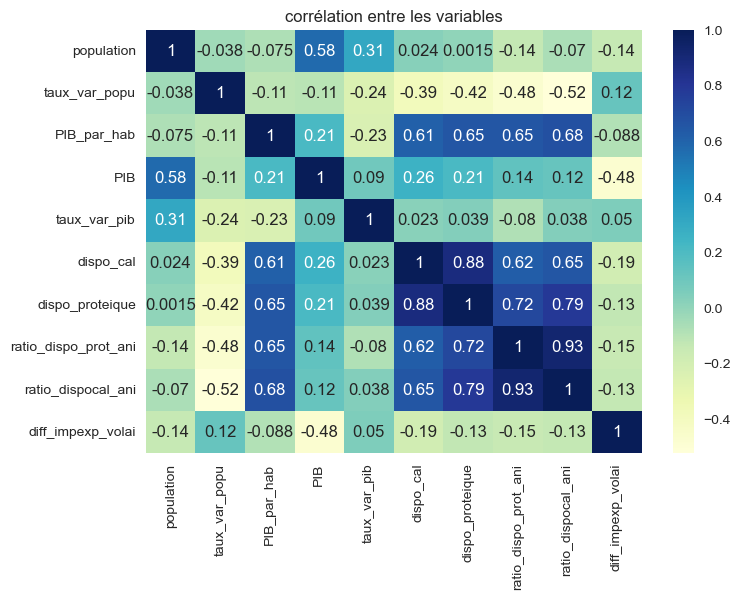

In [330]:
corr=table_indicateurs.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')
plt.title('corrélation entre les variables')

<b>Conclusion :</b> On remarque qu'il ya une forte corrélation entre les vaiables : disponibilité calorifique et disponibilité proteique, ratio diponibilité proteique d'origine animale et ratio disponibilité calorifique d'origine animale. Il ya également une bonne corrélation entre les variables disponibilité proteique et ratio disponibilité calorifque d'origine animale.

Réalisons un premier clustering pour voir les variables inutiles et les supprimer

In [331]:
from sklearn.cluster import KMeans
model_clusters_test=KMeans(n_clusters=5)
model_clusters_test.fit(table_indicateurs.iloc[:,2:-1])
model_clusters_test.labels_

array([4, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 4, 2, 2,
       1, 4, 4, 2, 4, 2, 2, 0, 2, 2, 2, 4, 2, 0, 4, 2, 2, 2, 4, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 0, 4, 2, 2, 4, 2, 2, 0, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 0, 2, 4, 2, 4, 2, 2, 3, 2, 2,
       2, 2, 2, 3, 2, 4, 0, 4, 4, 2, 2, 2, 2, 0, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 4, 2, 3, 4, 0, 2, 4, 4, 2])

In [332]:
table_indicateurs_test=table_indicateurs.copy()
table_indicateurs_test.insert(12,'clusters',model_clusters_test.labels_)

In [333]:
import plotly.express as px
px.choropleth(table_indicateurs_test,locations='Code_pays',
             color='clusters',hover_name='Code_pays',
               color_continuous_scale="Reds",
              projection='natural earth',
               title=("Pays par cluster")
              )

<b>Conclusion :</b>On va donc supprimer la variable ratio disponibilité calorifique d'origine animale.

In [334]:
table_indicateurs.drop(['ratio_dispocal_ani'],axis=1,inplace=True)

### Créons un cluster qui contient les outliers

In [335]:
outliers=table_indicateurs.loc[(table_indicateurs['Pays']=='Chine, continentale')|(table_indicateurs['Pays']=='Inde')|(table_indicateurs['Pays']=='États-Unis d\'Amérique'),:]
table_indicateurs=table_indicateurs.drop(outliers.index,axis=0)

### 2-Analyse en composante principale

Normalisons nos données

In [336]:
data=table_indicateurs.iloc[:,2:-1]
scaler=StandardScaler()
data_normalise=scaler.fit_transform(data)

Reduction de la dimentionnalité (4 dimensions)

In [337]:
model_r=PCA(n_components=4)
donne_reduis=model_r.fit_transform(data_normalise)
print(donne_reduis)

[[-2.70838992e+00  1.34134110e-01  1.82374088e-01  1.07727901e+00]
 [ 1.40071461e+00 -1.33663144e+00 -1.35873766e+00 -1.44808843e-04]
 [-1.10590592e+00  9.72992305e-01  4.19168159e+00  3.51556131e+00]
 [ 1.50053889e+00  4.19188826e-01  4.06486057e-01 -5.97125858e-01]
 [ 5.98140665e-01 -1.50588354e+00 -2.03184812e+00  4.00229639e-01]
 [-1.57135295e-01 -6.01487647e-01  9.87502029e-01 -1.27404265e+00]
 [ 2.86623969e+00  7.27120784e-01  8.02666642e-01  3.16645244e-01]
 [ 2.68977883e+00 -3.31980856e-01  7.70673928e-01  6.75614915e-02]
 [-1.47323291e-01 -1.27664785e+00 -2.11852547e+00  1.43276525e+00]
 [ 2.50849637e+00 -1.61932171e-01  7.25742782e-01 -3.17601801e-03]
 [-2.28131087e+00 -9.28818546e-02  3.96534166e-01  6.98499868e-01]
 [ 3.52765266e-02 -1.23212268e+00 -1.74219273e+00 -3.09305836e-01]
 [ 4.25487217e-01 -1.00465885e+00 -1.12877185e+00 -2.40684785e-01]
 [ 7.13453016e-01 -1.27378353e+00 -1.79552727e+00  1.21707200e-01]
 [-1.50221637e+00 -1.55173297e-01  1.23346611e+00 -4.17070296e

Déterminons l'inertie associéé a chaque plan factorielle et constuisons le diagramme de l'ebouli des valeurs propres

In [338]:
model_r.explained_variance_ratio_

array([0.42854544, 0.18566046, 0.16209998, 0.08432742])

In [339]:
np.sum(model_r.explained_variance_ratio_)

0.8606333039969902

In [340]:
variances=model_r.explained_variance_ratio_
somcum=np.cumsum(variances)

Text(0.5, 1.0, "Diagramme de l'ebouli des valeurs propre")

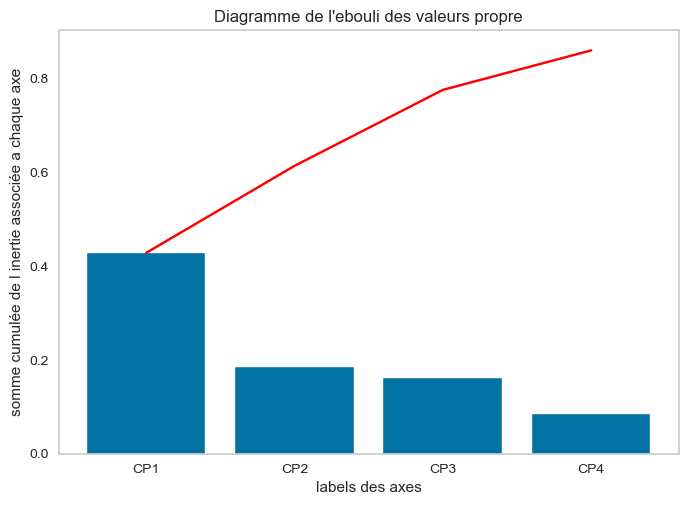

In [341]:
plans=['CP1','CP2','CP3','CP4']
plt.bar(plans,variances)
plt.plot(plans,somcum,c='red')
plt.grid()
plt.xlabel('labels des axes')
plt.ylabel('somme cumulée de l inertie associée a chaque axe')
plt.title('Diagramme de l\'ebouli des valeurs propre')

<b>Conclusion : </b> les quatres plans factorielles contiennent au total 86,12% des informations contenu dans les données initiales.

Affichons la formule de calcule de chaque composante

In [342]:
model_r.components_

array([[-0.01651471, -0.28600708,  0.41988294,  0.23766719, -0.03078493,
         0.47501596,  0.49481848,  0.46228415],
       [ 0.68674433,  0.14590702, -0.00708643,  0.63859771, -0.27555479,
        -0.00627024, -0.08854842, -0.12419959],
       [-0.33724635,  0.50520145,  0.36109719, -0.04959384, -0.70254491,
        -0.05195828, -0.02749648,  0.03406763],
       [ 0.19104594,  0.68119684,  0.23256823, -0.15568626,  0.48767254,
         0.29523167,  0.22440636, -0.21401325]])

creons un dataset qui contient les coordonnées composantes

In [343]:
composantes=pd.DataFrame(model_r.components_)

In [344]:
composantes.columns=data.columns
composantes.index=['CP1','CP2','CP3','CP4']
composantes.head()

,population,taux_var_popu,PIB_par_hab,PIB,taux_var_pib,dispo_cal,dispo_proteique,ratio_dispo_prot_ani
CP1,-0.016515,-0.286007,0.419883,0.237667,-0.030785,0.475016,0.494818,0.462284
CP2,0.686744,0.145907,-0.007086,0.638598,-0.275555,-0.006270,-0.088548,-0.124200
CP3,-0.337246,0.505201,0.361097,-0.049594,-0.702545,-0.051958,-0.027496,0.034068
CP4,0.191046,0.681197,0.232568,-0.155686,0.487673,0.295232,0.224406,-0.214013


Regardons les corrélations entre les variables et ces composantes principales ou le niveau d'influence de chaque variable sur chaque axe factoriel

Text(0.5, 1.0, 'corrélation entre les variables et chaque axe')

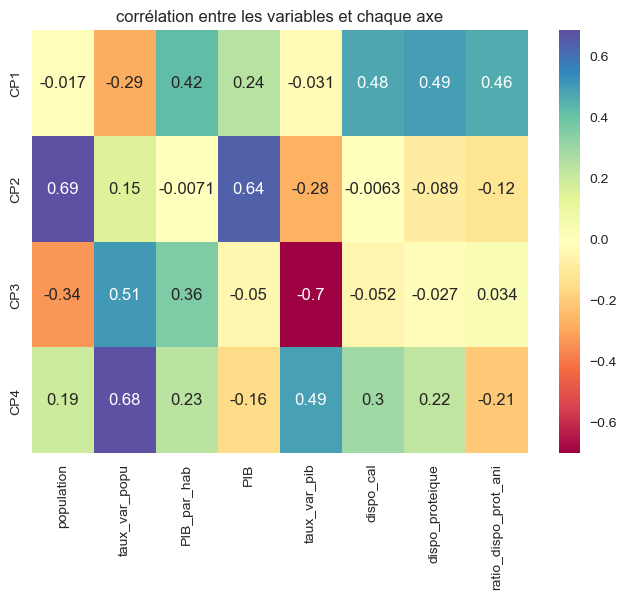

In [345]:
sns.heatmap(composantes,annot=True,cmap='Spectral')
plt.title('corrélation entre les variables et chaque axe')

<b>Conclusion</b> 
- Les variables qui influencent la construction du premier plan factoriel sont :dispo_proteique, ratio_dispocal_ani,pib_par_hab, ratio_dispo_prot_ani.  
- La variable Population et PIB influencent majoritairement la construction du deuxième plan factoriel.  

Construction du cercle de corrélation sur les deux premières composantes

Text(0.5, 1.0, 'Cercle de corrélation')

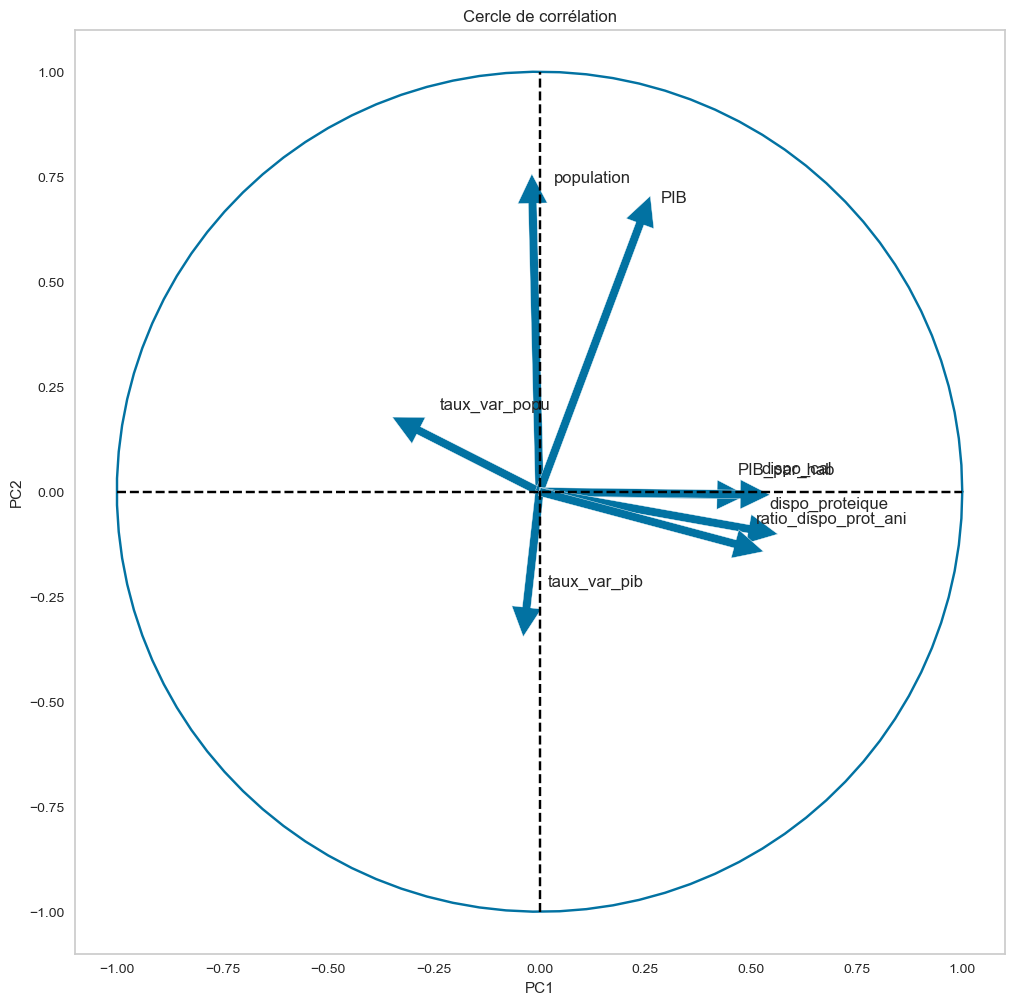

In [346]:
liste_nom=data.columns
fig=plt.figure(figsize=(12,12))
x=np.linspace(0,2*np.pi,100)
plt.plot(np.cos(x),np.sin(x))
plt.plot([0,0],[-1,1],ls='--',c='black')
plt.plot([-1,1],[0,0],ls='--',c='black')

for i in range(0,composantes.shape[1]):
    plt.arrow(0,0,composantes.iloc[0,i],composantes.iloc[1,i],head_width=0.07,head_length=0.07,width=0.02, )
    plt.text(composantes.iloc[0,i]+0.05,composantes.iloc[1,i]+0.05,liste_nom[i])
plt.grid()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle de corrélation')

<b>Conclusion : </b>
- Les variables PIB, Population et taux_var_pib sont très bien representée alors que les autres la qualité de la repésentation est très faible.  
- La variable Population influencent plus dans la construiction du deuxième plan factoriel ainsi que la variable PIB mais la variable taux_var_pib influence n"gativement la construction du deuxème plan factoriel.  
- dispo_proteique, ratio_dispocal_ani,pib_par_hab, ratio_dispo_prot_ani influence plus dans la constructon du premier plan factoriel  
- La variable taux_var_popu est mal représenté et est corrélé négativement avec les deux premier plan factoriel  

Projection des indicvidus sur le cercle de plan factoriel

In [347]:
data=data.set_index(table_indicateurs['Pays'])

Text(0.5, 1.0, 'Projection des individu des individus sur le plan factoriel')

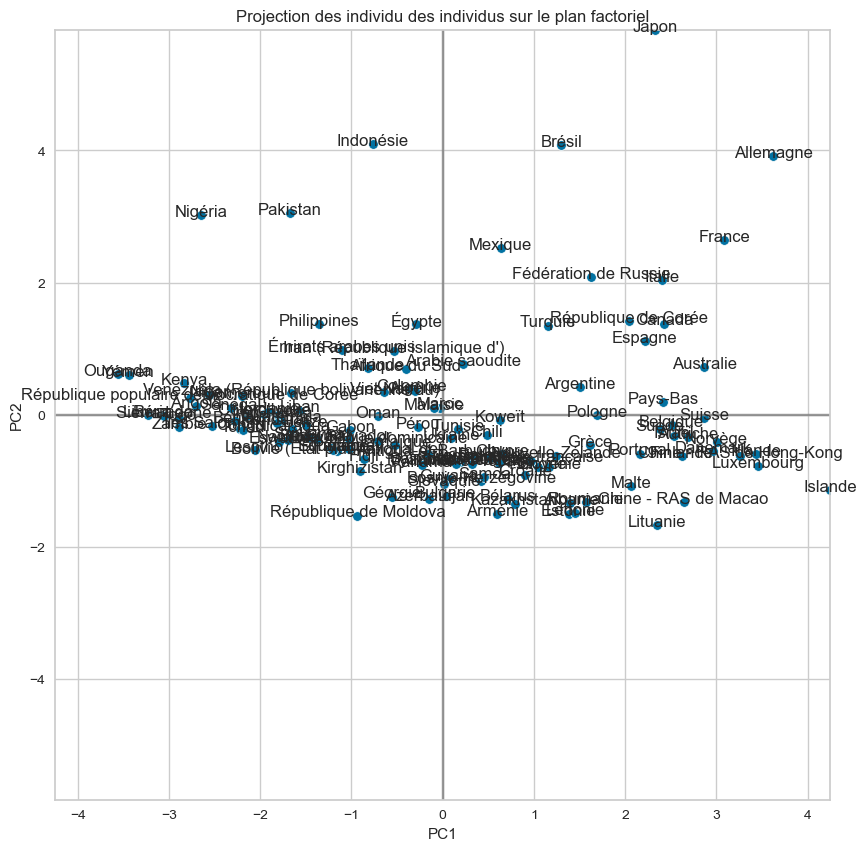

In [348]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))

x_max=donne_reduis[:,0].max()
y_max=donne_reduis[:,1].max()

sns.scatterplot(donne_reduis[:,0],donne_reduis[:,1])

plt.plot([-x_max,x_max],[0,0],c='gray',alpha=0.8)
plt.plot([0,0],[-y_max,y_max],c='gray',alpha=0.8)

ax.set_xlim(left=-x_max,right=x_max)
ax.set_ylim(bottom=-y_max,top=y_max)

labels=data.index
for i in range(0,donne_reduis.shape[0]) :
             plt.text(donne_reduis[i,0],donne_reduis[i,1]+0.05, labels[i], ha='center',va='center') 
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection des individu des individus sur le plan factoriel')

<b>Conclusion : </b> D'entré de jeu on remarque la formation de 3 groupes bien séparés.

Segmentation et création des clusters avec la classification hierarchique

<AxesSubplot:>

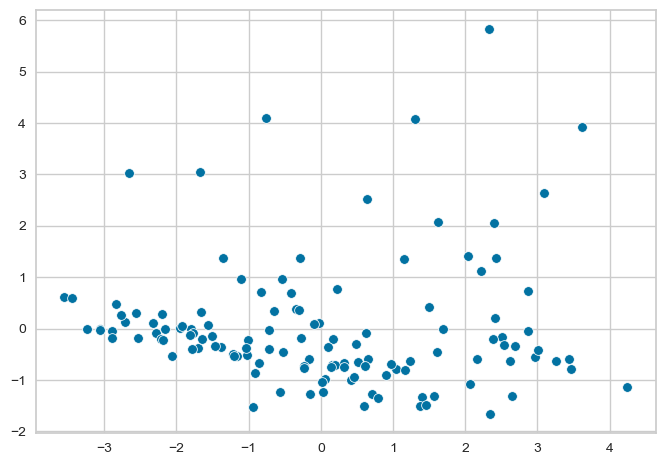

In [349]:
sns.scatterplot(donne_reduis[:,0],donne_reduis[:,1])

Création d'un dendogramme

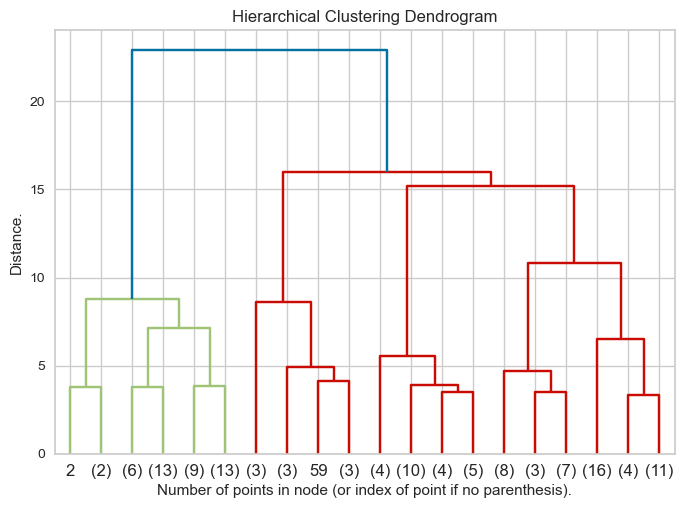

In [350]:
Z=linkage(donne_reduis,method='ward',metric="euclidean")
graphe=dendrogram(Z,p=20,truncate_mode='lastp',show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()

<b>Conclusion :</b> A partir de ce dendrogramme nous pouvons choisir 4 clusters

Appliquons la classificattion ascendente

In [351]:
model_ward=AgglomerativeClustering(n_clusters=4,linkage='ward')
model_ward.fit(donne_reduis)
model_ward.labels_

array([1, 0, 1, 3, 0, 0, 3, 3, 0, 3, 1, 0, 0, 0, 1, 1, 2, 0, 1, 3, 3, 0,
       1, 1, 1, 0, 0, 0, 2, 0, 3, 1, 0, 1, 0, 3, 0, 3, 1, 2, 1, 0, 1, 3,
       1, 0, 3, 1, 0, 0, 2, 3, 0, 1, 3, 3, 2, 0, 1, 2, 0, 1, 1, 0, 3, 1,
       1, 1, 1, 1, 0, 3, 0, 3, 0, 0, 2, 3, 0, 0, 0, 1, 1, 2, 1, 3, 3, 0,
       1, 2, 0, 0, 0, 3, 1, 3, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 3,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

<AxesSubplot:>

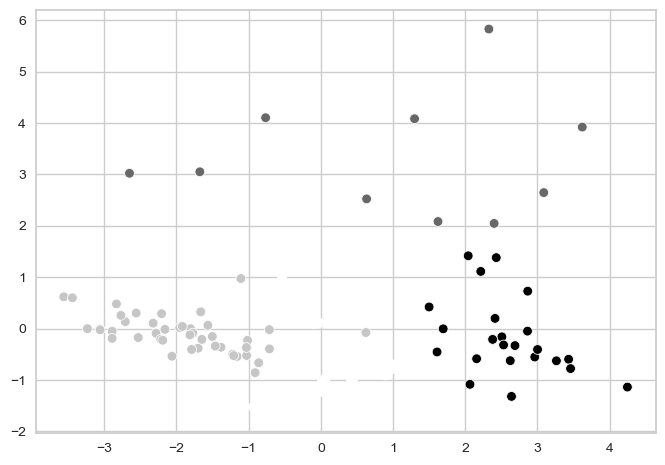

In [352]:
labels_colors=model_ward.labels_
sns.scatterplot(donne_reduis[:,0],donne_reduis[:,1],c=labels_colors)

Classification avec Kmeans

 Déterminons avec la méthode des coude le nombre optimal de clusters

Text(0.5, 1.0, 'courbe Methode des coudes')

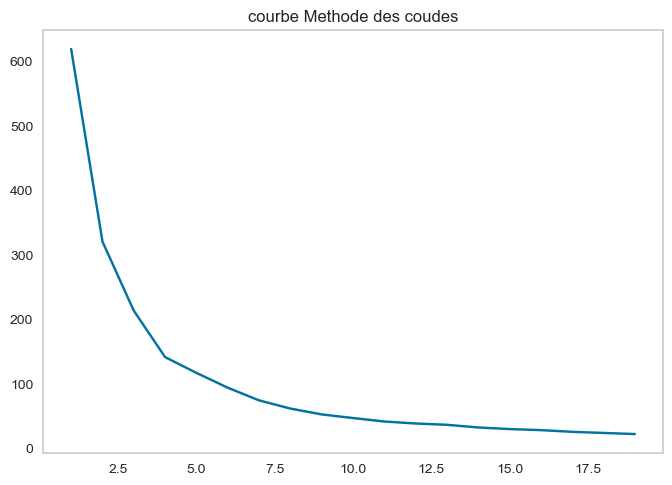

In [353]:
donnr=donne_reduis[:,[0,1]]
cout=[]
n=range(1,20)
for i in n :
    model=KMeans(n_clusters=i).fit(donnr)
    cout.append(model.inertia_)
plt.plot(n,cout)
plt.grid()
plt.title('courbe Methode des coudes')

Calcul du coefficient de silhouette

In [354]:
from sklearn.metrics import silhouette_score
for i in range(2,6):
    model_score=KMeans(n_clusters=i)
    model_score.fit(donnr)
    model_score.labels_
    score = silhouette_score(donnr, model_score.labels_, metric='euclidean')
    print("Le score pour",i,"clusters est :",score)

Le score pour 2 clusters est : 0.4329977642829893
Le score pour 3 clusters est : 0.45365849850753354
Le score pour 4 clusters est : 0.43630366938869886
Le score pour 5 clusters est : 0.3920567349544983


<b>Conclusion :</b>Donc le nombre optimal de cluster est : 3 clusters

Utilisons la bibliothèque Yellowbrik pour visualiser la performence de notre algorithme de classification

Elbow Method

In [355]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

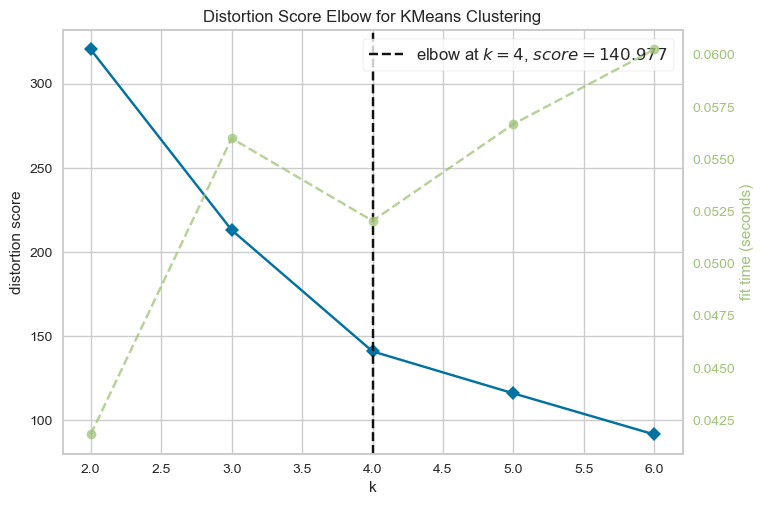

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [356]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,7))

visualizer.fit(donnr)    
visualizer.poof() 

<b>Conclusion</b> Avec cette methode on voit que le nombre optimal de clusters est 4 clusters.

Silhouette Visualizer : 
Avec 3 clusters

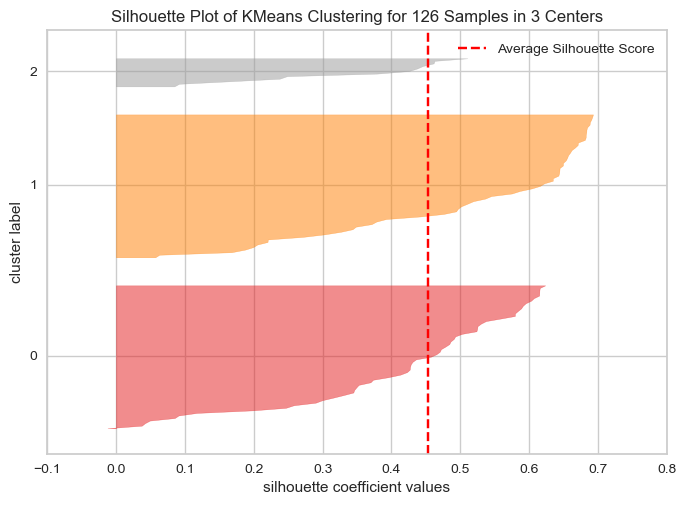

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 126 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [357]:
model = KMeans(3, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(donnr)    
visualizer.show()

Silhouette Visualizer : 
Avec 4 clusters

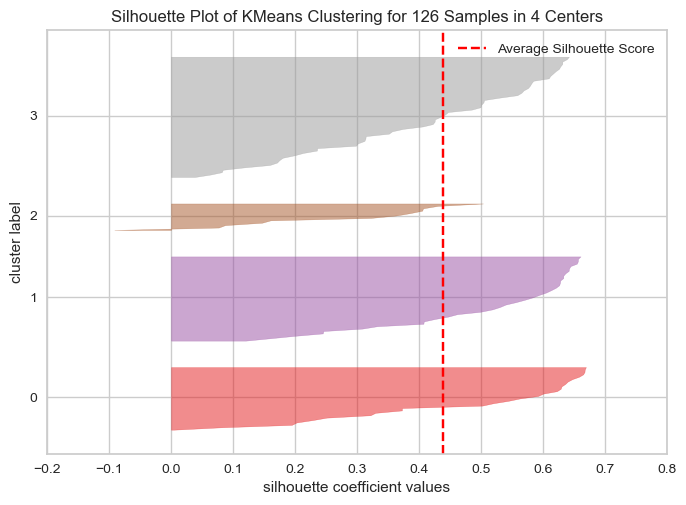

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 126 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [358]:
model = KMeans(4, random_state=42)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(donnr)    
visualizer.show()

<b>Conclusion:</b> Le coefficient de silhouette est max pour 3 clusters. Mais la methode elbow nous montre que le nombre optimal de clusters est 4.

<b>NB : </b> Les resultats des deux clustering sont presque identique mais dans la suite nous allons choisir Le Kmeans avec 4 clusters.

Visualisons nos clusters et leurs centroide

In [359]:
model_clusters=KMeans(n_clusters=4)
model_clusters.fit(donnr)
model_clusters.labels_

array([0, 1, 0, 1, 3, 3, 1, 1, 3, 1, 0, 3, 3, 3, 0, 3, 2, 3, 0, 2, 1, 3,
       0, 0, 0, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 2, 1, 1, 3, 2, 3, 3, 0, 1,
       0, 3, 1, 0, 3, 3, 2, 1, 3, 0, 1, 1, 2, 3, 0, 2, 3, 0, 3, 3, 2, 3,
       0, 0, 0, 0, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1,
       3, 0, 3, 3, 0, 1, 0, 1, 3, 3, 1, 2, 0, 3, 0, 0, 0, 3, 3, 3, 1, 1,
       0, 0, 0, 3, 3, 3, 2, 0, 3, 3, 0, 3, 3, 0, 3, 0])

In [360]:
centroide=model_clusters.cluster_centers_
centroide

array([[-2.21415669,  0.22287852],
       [ 2.35087691, -0.61716207],
       [ 1.83936387,  2.70672102],
       [-0.11443926, -0.46746869]])

Text(0.5, 1.0, 'Regroupements des variables en deux clusters')

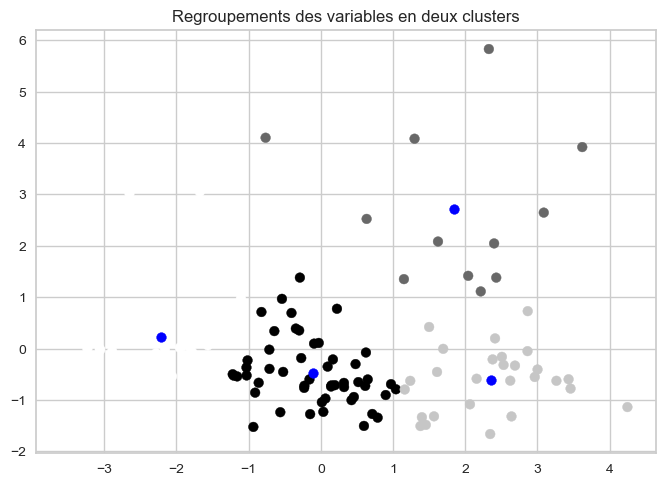

In [361]:
clusters=model_clusters.predict(donnr)
plt.scatter(donnr[:,0],donnr[:,1],c=clusters)
plt.scatter(centroide[:,0],centroide[:,1],c='blue')
plt.title('Regroupements des variables en deux clusters')

<b>Conclusion:</b>
- la méthode de Kmean nous resort un nombre de clusters égal à 4 de meme que le dendrogramme de la classification hiérarchique nous laisse croire qu'on peut choisir 4 clusters.  
- Les centroides comme sur la figure précédente sont très éloignés entre eux donc la distance inter-clusters est importante donc nos clusters sont homogènes et ont également une bonne forme (Distance intra-clusters est faible).

Visualisons nos clusters sur une carte

In [362]:
table_indicateurs.insert(11,'clusters',model_clusters.labels_)

In [363]:
table_indicateurs.head()

,Code_pays,Pays,population,taux_var_popu,PIB_par_hab,PIB,taux_var_pib,dispo_cal,dispo_proteique,ratio_dispo_prot_ani,diff_impexp_volai,clusters
1,AGO,Angola,30809787.0,0.879164,3289.643374,101353.211652,3.418259,2441.0,53.59,0.308080,277.0,0
2,ALB,Albanie,2882740.0,-0.078774,5257.650696,15156.439968,3.717436,3326.0,114.72,0.546635,38.0,1
3,ARE,Émirats arabes unis,9630959.0,2.072996,43839.356349,422215.043585,0.299848,3075.0,82.35,0.406436,339.0,0
4,ARG,Argentine,44361150.0,0.203152,11668.472390,517626.853947,0.396165,3269.0,105.69,0.640174,-199.0,1
5,ARM,Arménie,2951745.0,-0.038391,4220.534194,12457.940705,5.355209,3128.0,102.04,0.489318,35.0,3


In [364]:
import plotly.express as px
px.choropleth(table_indicateurs,locations='Code_pays',
             color='clusters',hover_name='Code_pays',
               color_continuous_scale="Reds",
              projection='natural earth',
               title=("Carte des différents clusters")
              )

#### Si nous revenons a la projection des individus sur le plan factoriel :

- Le clusters 2 est constitué des pays qui ont une forte disponibilité calorifique, proteique, calorifique d'origine animale, proteique d'origine animale et un PIB par habitant élevé mais d'autre d'entre eux ont une population et un PIB élevé tandis que d'autres sont corrélé négativement avec ces deux variables. ces pays en majorité ont un taux de variation du pib élevé.
- Les pays du clusters 3, sont des pays qui ont une forte disponibilité calorifique, proteique, calorifique d'origine animale, proteique d'origine animale et un PIB par habitant élevé donc il s'agit des pays avec une économie forte.  
- Le Clusters 0 est constitué des pays correlé négativement avec les variable disponibilité calorifique, proteique, calorifique d'origine animale, proteique d'origine animale, mais qui a le taux de variation de la population elevé.
- Le cluster 1 est constitué des pays avec une disponibilité calorifique, proteique, calorifique d'origine animale, proteique d'origine animale moyen et un PIB par habitant moyen également. 

Analyse de chaque clusters

In [365]:
cluster0=table_indicateurs[table_indicateurs['clusters']==0]
cluster0['Pays'].unique()

array(['Angola', 'Émirats arabes unis', 'Bénin', 'Belize', 'Botswana',
       "Côte d'Ivoire", 'Cameroun', 'Congo', 'Ghana', 'Guatemala',
       'Honduras', 'Iraq', 'Jordanie', 'Kenya', 'Liban', 'Libéria',
       'Sri Lanka', 'Lesotho', 'Namibie', 'Niger', 'Nigéria', 'Nicaragua',
       'Pakistan', 'Philippines',
       'République populaire démocratique de Corée', 'Rwanda', 'Sénégal',
       'Îles Salomon', 'Sierra Leone', 'Eswatini', 'Tchad', 'Togo',
       'Ouganda', 'Venezuela (République bolivarienne du)', 'Yémen',
       'Zambie'], dtype=object)

In [366]:
cluster1=table_indicateurs[table_indicateurs['clusters']==1]
cluster1['Pays'].unique()

array(['Albanie', 'Argentine', 'Australie', 'Autriche', 'Belgique',
       'Suisse', 'Danemark', 'Estonie', 'Finlande', 'Grèce',
       'Chine - RAS de Hong-Kong', 'Irlande', 'Islande', 'Israël',
       'Lituanie', 'Luxembourg', 'Lettonie', 'Chine - RAS de Macao',
       'Malte', 'Pays-Bas', 'Norvège', 'Nouvelle-Zélande', 'Pologne',
       'Portugal', 'Roumanie', 'Slovénie', 'Suède'], dtype=object)

In [367]:
cluster_outliers=outliers
cluster_outliers['Pays'].unique()

array(['Chine, continentale', 'Inde', "États-Unis d'Amérique"],
      dtype=object)

In [368]:
cluster2=table_indicateurs[table_indicateurs['clusters']==2]
cluster2['Pays'].unique()

array(['Brésil', 'Canada', 'Allemagne', 'Espagne', 'France', 'Indonésie',
       'Italie', 'Japon', 'République de Corée', 'Mexique',
       'Fédération de Russie', 'Turquie'], dtype=object)

In [369]:
cluster3=table_indicateurs[table_indicateurs['clusters']==3]
cluster3['Pays'].unique()

array(['Arménie', 'Antigua-et-Barbuda', 'Azerbaïdjan', 'Bulgarie',
       'Bosnie-Herzégovine', 'Bélarus', 'Bolivie (État plurinational de)',
       'Barbade', 'Chili', 'Colombie', 'Costa Rica', 'Chypre',
       'Dominique', 'République dominicaine', 'Algérie', 'Équateur',
       'Égypte', 'Fidji', 'Gabon', 'Géorgie', 'Guyana', 'Croatie',
       'Hongrie', "Iran (République islamique d')", 'Jamaïque',
       'Kazakhstan', 'Kirghizistan', 'Saint-Kitts-et-Nevis', 'Koweït',
       'Maroc', 'République de Moldova', 'Myanmar', 'Maurice', 'Malaisie',
       'Oman', 'Panama', 'Pérou', 'Paraguay', 'Polynésie française',
       'Arabie saoudite', 'El Salvador', 'Suriname', 'Slovaquie',
       'Thaïlande', 'Trinité-et-Tobago', 'Tunisie', 'Ukraine', 'Uruguay',
       'Viet Nam', 'Samoa', 'Afrique du Sud'], dtype=object)

####   Test statistique pour vérifier la différence entre les clusters

<b> Hyphothèse H0 <<Les moyennes sont égales>> </b>  
<b> Hyphothèse H1 <<Les moyennes ne sont pas égales>> </b>  
Ici on veut comparer les moyennes de quatre variables, donc il faut utiliser le test d'ANOVA. Pour ce faire il faut vérifier si ces deux variables suivent la loi normale(test de shapiro) et s'ils ont la meme variance(test de levene)

Si la p_value est inferieur a 0.05 on rejette l'hypothèse H0 et on accepte l'hypothèse H1. Dans le cas contraire on accepte l'hypothèse H0.  

In [370]:
import scipy.stats as stats 

In [371]:
stats.shapiro(cluster0['ratio_dispo_prot_ani'])

ShapiroResult(statistic=0.9852712750434875, pvalue=0.9031659960746765)

In [372]:
stats.shapiro(cluster1['ratio_dispo_prot_ani'])

ShapiroResult(statistic=0.9647598266601562, pvalue=0.47103890776634216)

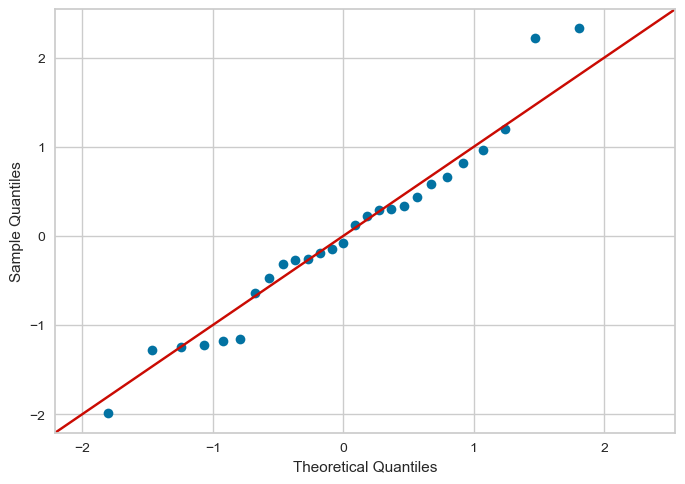

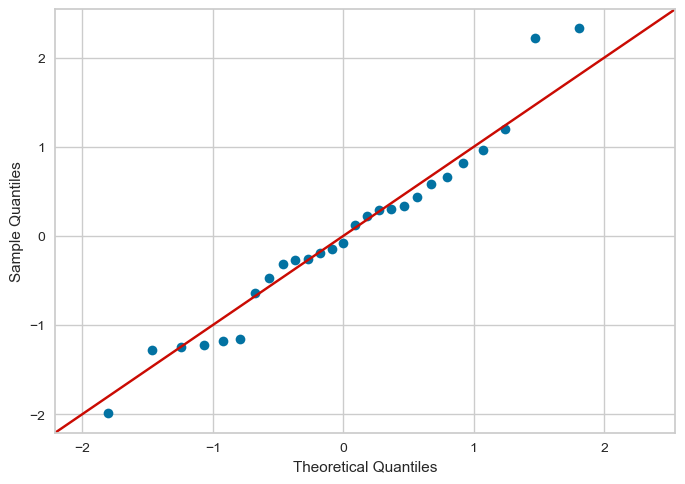

In [373]:
import statsmodels.api as sm
sm.qqplot(cluster1['ratio_dispo_prot_ani'],line='45',fit=True)

In [374]:
stats.shapiro(cluster2['ratio_dispo_prot_ani'])

ShapiroResult(statistic=0.8403720855712891, pvalue=0.02797737345099449)

In [375]:
stats.shapiro(cluster3['ratio_dispo_prot_ani'])

ShapiroResult(statistic=0.9765527844429016, pvalue=0.4043627083301544)

In [376]:
stats.levene(cluster0['ratio_dispo_prot_ani'],cluster1['ratio_dispo_prot_ani'],cluster2['ratio_dispo_prot_ani'],cluster3['ratio_dispo_prot_ani'],center='median')

LeveneResult(statistic=3.0281101609974503, pvalue=0.032106670789534775)

Les quatre variables suivent la loi normale mais n'ont pas la meme variance donc nous allons utiliser le test de Kruskal wallis

In [377]:
from scipy.stats import kruskal
vect=kruskal(cluster0['ratio_dispo_prot_ani'],cluster1['ratio_dispo_prot_ani'],cluster2['ratio_dispo_prot_ani'],cluster3['ratio_dispo_prot_ani'])
print(vect)

KruskalResult(statistic=81.98368586279656, pvalue=1.1520630258399139e-17)


<b>Conclusion : </b> 1-La p_valeur est inférieur à 0,05 donc l'hypothèse H0 est rejeté. Donc les moyennes de ces variables ne sont pas égales. Donc ces clusters sont indépendants

#### Analyse bivariée des clusters

Avec un boxplot

<AxesSubplot:xlabel='clusters', ylabel='diff_impexp_volai'>

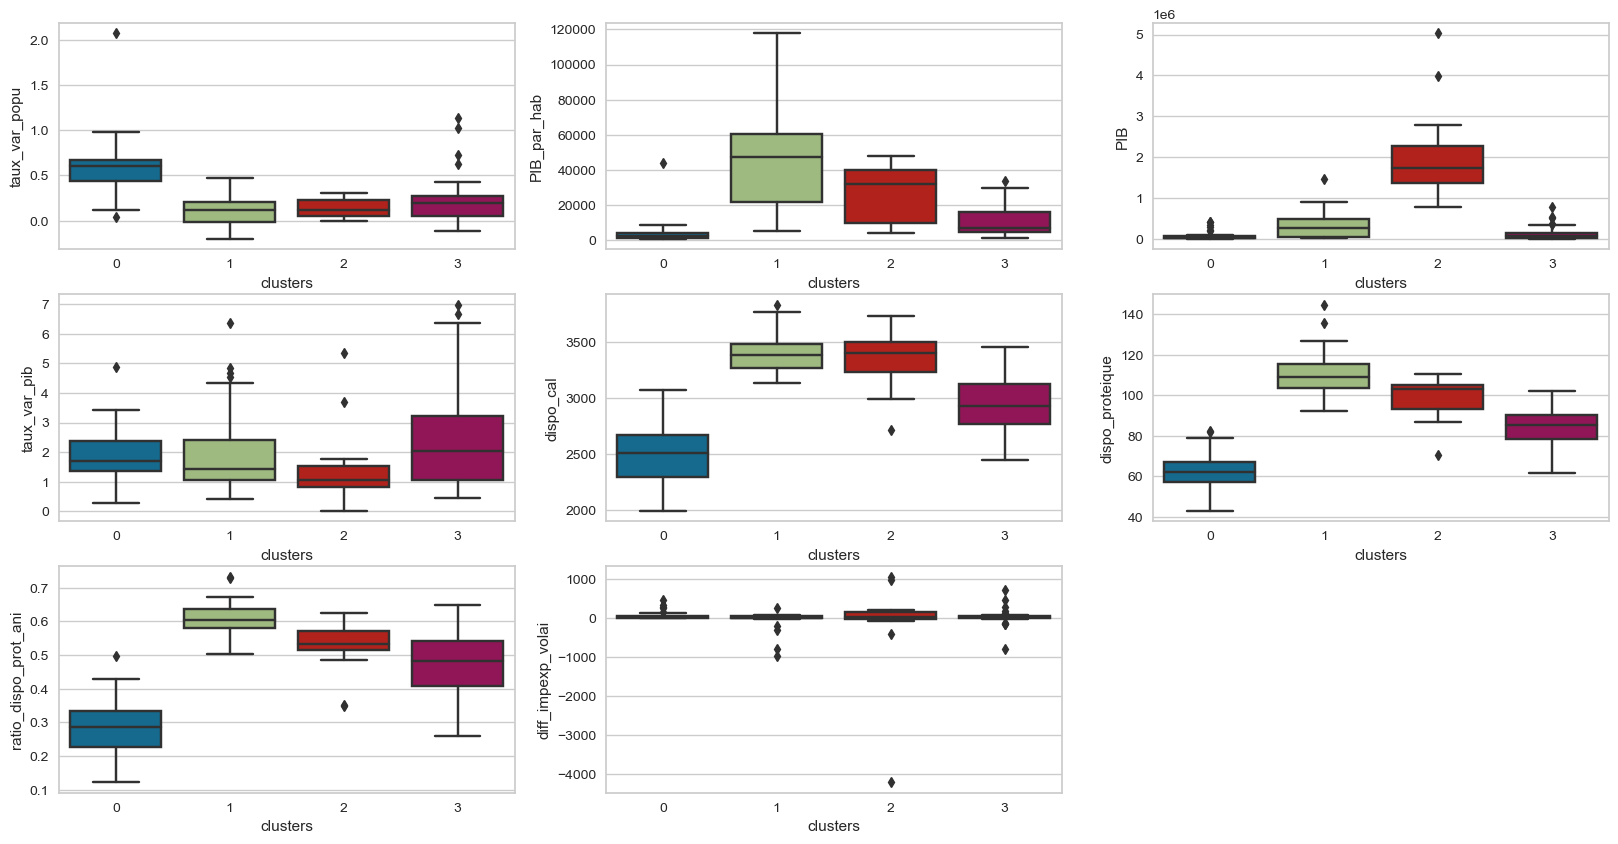

In [378]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.boxplot(data=table_indicateurs,x='clusters',y='taux_var_popu')
plt.subplot(3,3,2)
sns.boxplot(data=table_indicateurs,x='clusters',y='PIB_par_hab')
plt.subplot(3,3,3)
sns.boxplot(data=table_indicateurs,x='clusters',y='PIB')
plt.subplot(3,3,4)
sns.boxplot(data=table_indicateurs,x='clusters',y='taux_var_pib')
plt.subplot(3,3,5)
sns.boxplot(data=table_indicateurs,x='clusters',y='dispo_cal')
plt.subplot(3,3,6)
sns.boxplot(data=table_indicateurs,x='clusters',y='dispo_proteique')
plt.subplot(3,3,7)
sns.boxplot(data=table_indicateurs,x='clusters',y='ratio_dispo_prot_ani')
plt.subplot(3,3,8)
sns.boxplot(data=table_indicateurs,x='clusters',y='diff_impexp_volai')

Avec un violinplot

<AxesSubplot:xlabel='clusters', ylabel='diff_impexp_volai'>

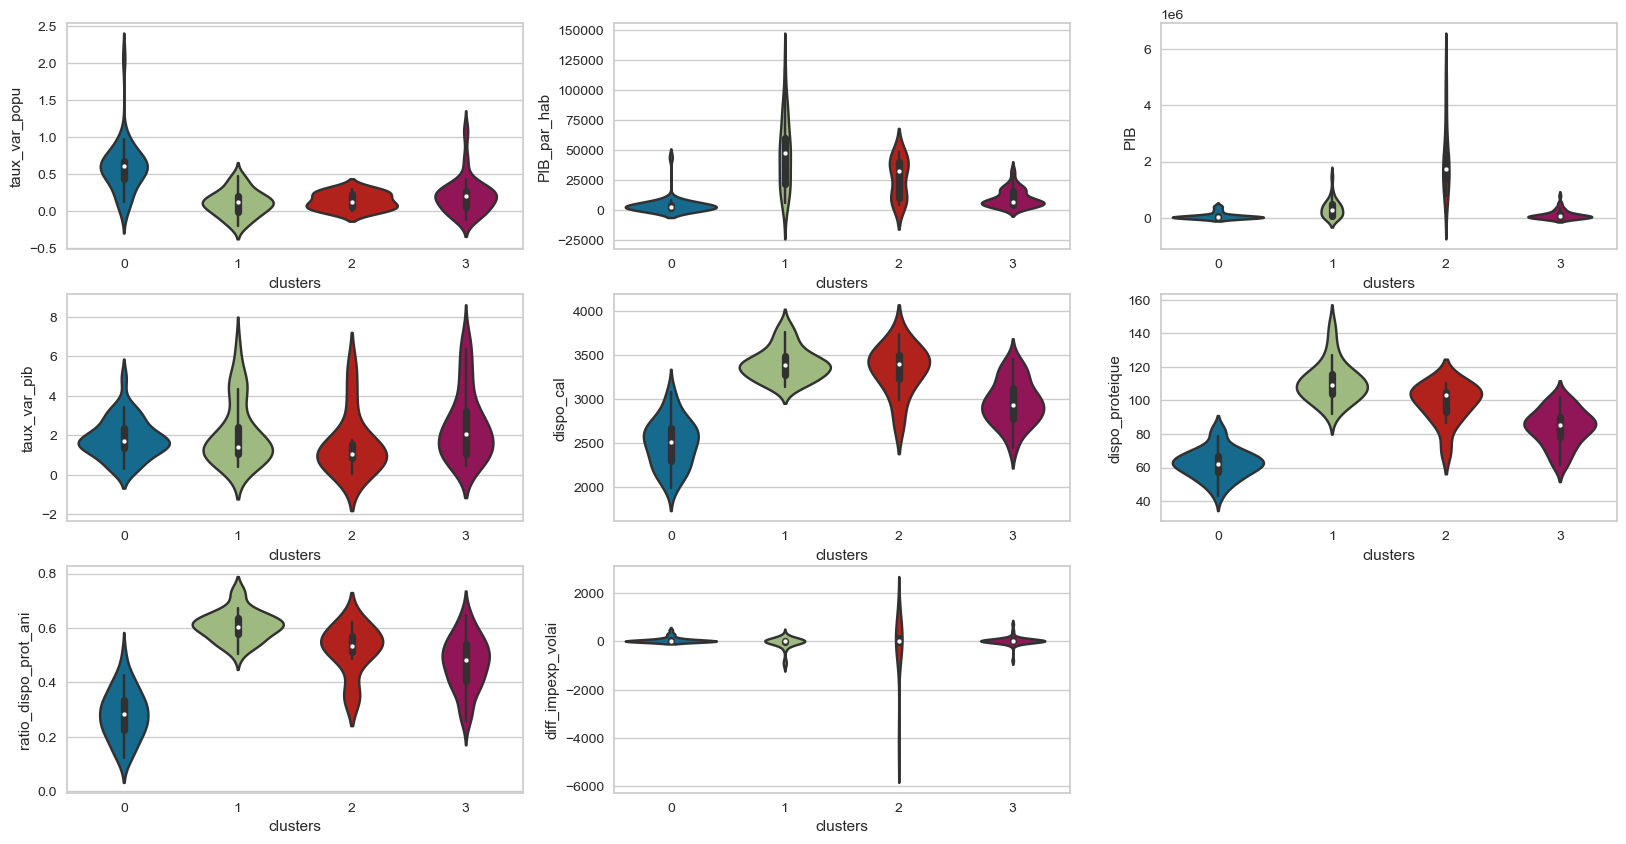

In [379]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
sns.violinplot(data=table_indicateurs,x='clusters',y='taux_var_popu')
plt.subplot(3,3,2)
sns.violinplot(data=table_indicateurs,x='clusters',y='PIB_par_hab')
plt.subplot(3,3,3)
sns.violinplot(data=table_indicateurs,x='clusters',y='PIB')
plt.subplot(3,3,4)
sns.violinplot(data=table_indicateurs,x='clusters',y='taux_var_pib')
plt.subplot(3,3,5)
sns.violinplot(data=table_indicateurs,x='clusters',y='dispo_cal')
plt.subplot(3,3,6)
sns.violinplot(data=table_indicateurs,x='clusters',y='dispo_proteique')
plt.subplot(3,3,7)
sns.violinplot(data=table_indicateurs,x='clusters',y='ratio_dispo_prot_ani')
plt.subplot(3,3,8)
sns.violinplot(data=table_indicateurs,x='clusters',y='diff_impexp_volai')

#### Avec un Radarplot

In [380]:
import plotly.graph_objects as go

rgroup1=(table_indicateurs.groupby('clusters')['PIB_par_hab'].median())/50000
rgroup2=table_indicateurs.groupby('clusters')['ratio_dispo_prot_ani'].median()
rgroup3=(table_indicateurs.groupby('clusters')['diff_impexp_volai'].median())/20
rgroup4=table_indicateurs.groupby('clusters')['taux_var_popu'].median()

categories = ['cluster0','cluster1','cluster2','cluster3']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=rgroup1,
      theta=categories,
      fill='toself',
      name='PIB_par_hab'
))
fig.add_trace(go.Scatterpolar(
      r=rgroup2,
      theta=categories,
      fill='toself',
      name='ratio_dispo_prot_ani'
))
fig.add_trace(go.Scatterpolar(
      r=rgroup3,
      theta=categories,
      fill='toself',
      name='diff_impexp_volai'
))
fig.add_trace(go.Scatterpolar(
      r=rgroup4,
      theta=categories,
      fill='toself',
      name='taux_var_popu'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

#### Analyse des graphiques

<b>Cluster_outliers : </b> Le cluster_outliers contient trois pays. Donc ce cluster n'est pas pertinent.

<b>Cluster0 : </b> Le cluster 0 est constitué des pays africains et des petits pays d'asie, il est le cluster avec le taux de variation de la population le plus élevé et avec le PIB par habitant le plus faible. C'est le cluter qui contient la mediane de la disponibilité  calorifique, la disponibilité  proteique, le ratio disponibilité proteique d'origine animale, le ratio disponibilité calorifique les plus faibles. La mediane de son taux de variation du PIB et d'autres données sont presque égales à aux données du cluster 3. Donc il faut étudier les clusters 1 et 2 pour faire notre choix du meilleur cluster.

<b>Cluster2 : </b> Dans le cluster 2 le PIB par habitant est inférieur à celle du cluster1 et il es est de meme avec  la disponibilité proteique d'origine animale donc ces pays consomment  moin de viande que ceux du cluster 1.

<b>Cluster1 : </b> Dans le cluster 1 le PIB par habitant est élevé et ces pays consomment plus la viande que dans le clusters 2 et importent plus qu'ils exportent.

<b>Conclusion: </b>  Donc nous allons choisir les pays du cluster 1 donc la différence des importation et des exportations est positive.car ils consomment beaucoup de vaiande importent plus, ont un pib élevé et une population élevé (La demande sera importante) alors nos articles peuvent etre vendu a de meilleur prix.

In [381]:
pays_choisi=cluster1[cluster1['diff_impexp_volai']>0]
pays_choisi['Pays'].unique()

array(['Albanie', 'Autriche', 'Suisse', 'Estonie', 'Finlande', 'Grèce',
       'Chine - RAS de Hong-Kong', 'Irlande', 'Islande', 'Luxembourg',
       'Lettonie', 'Chine - RAS de Macao', 'Malte', 'Norvège', 'Portugal',
       'Roumanie', 'Suède'], dtype=object)

In [382]:
pays_choisi.head(17)

,Code_pays,Pays,population,taux_var_popu,PIB_par_hab,PIB,taux_var_pib,dispo_cal,dispo_proteique,ratio_dispo_prot_ani,diff_impexp_volai,clusters
2,ALB,Albanie,2882740.0,-0.078774,5257.650696,15156.439968,3.717436,3326.0,114.72,0.546635,38.0,1
8,AUT,Autriche,8891388.0,0.101882,51192.024455,455168.151939,1.099001,3687.0,107.42,0.595327,32.0,1
27,CHE,Suisse,8525611.0,0.193435,86274.086579,735539.301553,1.202453,3388.0,96.92,0.625155,47.0,1
48,EST,Estonie,1322920.0,-0.054457,23047.123715,30489.500905,4.666244,3138.0,101.19,0.615970,10.0,1
50,FIN,Finlande,5522576.0,0.064500,49925.087042,275715.087495,1.060426,3337.0,118.22,0.632380,4.0,1
60,GRC,Grèce,10522246.0,-0.050519,20152.490167,212049.459052,0.695516,3373.0,105.99,0.543070,50.0,1
64,HKG,Chine - RAS de Hong-Kong,7371730.0,0.115859,49064.673097,361691.522613,0.888154,3269.0,135.91,0.732911,244.0,1
71,IRL,Irlande,4818690.0,0.273740,79905.889623,385041.711267,2.024170,3835.0,115.46,0.605231,6.0,1
74,ISL,Islande,336713.0,0.200681,78010.245395,26267.063758,1.423844,3652.0,144.80,0.727279,2.0,1
95,LUX,Luxembourg,604245.0,0.385556,117973.701723,71285.019397,1.429408,3468.0,109.84,0.621085,10.0,1


#### Observons  les pays choisis sur une carte

In [383]:
import plotly.express as px
px.choropleth(pays_choisi,locations='Code_pays',
             color='clusters',hover_name='Code_pays',
               color_continuous_scale="Reds",
              projection='natural earth',
               title=("Carte des pays du cluster 1")
              )

#### Analysons de plus près les pays du cluster 1.

In [384]:
pays_choisi.head(17).sort_values(by='PIB',ascending=False)['Pays'].unique()

array(['Suisse', 'Suède', 'Autriche', 'Norvège', 'Irlande',
       'Chine - RAS de Hong-Kong', 'Finlande', 'Portugal', 'Roumanie',
       'Grèce', 'Luxembourg', 'Chine - RAS de Macao', 'Lettonie',
       'Estonie', 'Islande', 'Malte', 'Albanie'], dtype=object)

<b>Classement des pays par population:</b> 'Roumanie', 'Grèce', 'Portugal', 'Suède', 'Autriche', 'Suisse',
       'Chine - RAS de Hong-Kong', 'Finlande', 'Norvège', 'Irlande',
       'Albanie', 'Lettonie', 'Estonie', 'Chine - RAS de Macao',
       'Luxembourg', 'Malte', 'Islande'

<b>Classement des pays par PIB_par_hab :</b> Luxembourg', 'Chine - RAS de Macao', 'Suisse', 'Norvège',
       'Irlande', 'Islande', 'Suède', 'Autriche', 'Finlande',
       'Chine - RAS de Hong-Kong', 'Malte', 'Portugal', 'Estonie',
       'Grèce', 'Lettonie', 'Roumanie', 'Albanie'

<b>classement des pays par importation de la volaille : </b>'Chine - RAS de Hong-Kong', 'Roumanie', 'Suède', 'Grèce', 'Suisse','Portugal', 'Albanie', 'Autriche', 'Lettonie',
       'Chine - RAS de Macao', 'Luxembourg', 'Estonie', 'Malte',
       'Irlande', 'Finlande', 'Norvège', 'Islande'

<b>Gros consommateurs de la viande  : </b> Chine - RAS de Hong-Kong', 'Islande', 'Chine - RAS de Macao',
       'Suède', 'Finlande', 'Portugal', 'Suisse', 'Luxembourg', 'Estonie',
       'Irlande', 'Norvège', 'Autriche', 'Lettonie', 'Malte', 'Albanie',
       'Grèce', 'Roumanie']

<b>Classement des pays en fonction du PIB:</b>'Suisse', 'Suède', 'Autriche', 'Norvège', 'Irlande',
       'Chine - RAS de Hong-Kong', 'Finlande', 'Portugal', 'Roumanie',
       'Grèce', 'Luxembourg', 'Chine - RAS de Macao', 'Lettonie',
       'Estonie', 'Islande', 'Malte', 'Albanie'

<b> Meilleurs pays : </b> La chine de Hong-kong est l'un des plus gros consommateur de la volaille, l'un des plus gros importateur de la volaille avec un PIB élevé et une forte population donc elle est le premier pays à cibler. Dans la meme logique nous pouvons choisir : Suède, Suisse, La Roumanie, l'Autriche et la grèce.